In [188]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [189]:
df=pd.read_csv('mushrooms.csv')
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [190]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [191]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [192]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [193]:
col=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in col:
    x=df[i].unique()
    print(i ,'-->',x)

class --> ['p' 'e']
cap-shape --> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface --> ['s' 'y' 'f' 'g']
cap-color --> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises --> ['t' 'f']
odor --> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment --> ['f' 'a']
gill-spacing --> ['c' 'w']
gill-size --> ['n' 'b']
gill-color --> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape --> ['e' 't']
stalk-root --> ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring --> ['s' 'f' 'k' 'y']
stalk-surface-below-ring --> ['s' 'f' 'y' 'k']
stalk-color-above-ring --> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring --> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type --> ['p']
veil-color --> ['w' 'n' 'o' 'y']
ring-number --> ['o' 't' 'n']
ring-type --> ['p' 'e' 'l' 'f' 'n']
spore-print-color --> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population --> ['s' 'n' 'a' 'v' 'y' 'c']
habitat --> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


We have ? in stalk root

Have to decide whether to remove or to replace.


let us change the ? into na values and find the number of places where ? is there

In [194]:
df['stalk-root']=df['stalk-root'].replace('?',np.NaN)

In [195]:
df['stalk-root'].isna().sum()

2480

The total count that we have is 8124 which is almost 30% of unknown values. hence removing the column from df

In [196]:
df=df.drop(columns='stalk-root')

In [197]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Now we have 22 columns

We have to encode the whole data now to do the visualisation

In [198]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [199]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
col=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in col:
    df[i]=lb.fit_transform(df[i])

In [200]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [201]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [202]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

In [204]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Cannot judge as we do not know what each column stands for and better clarity can only be got from corr plot, box plot and zscore determination

### Visualisation:

Correlation plot


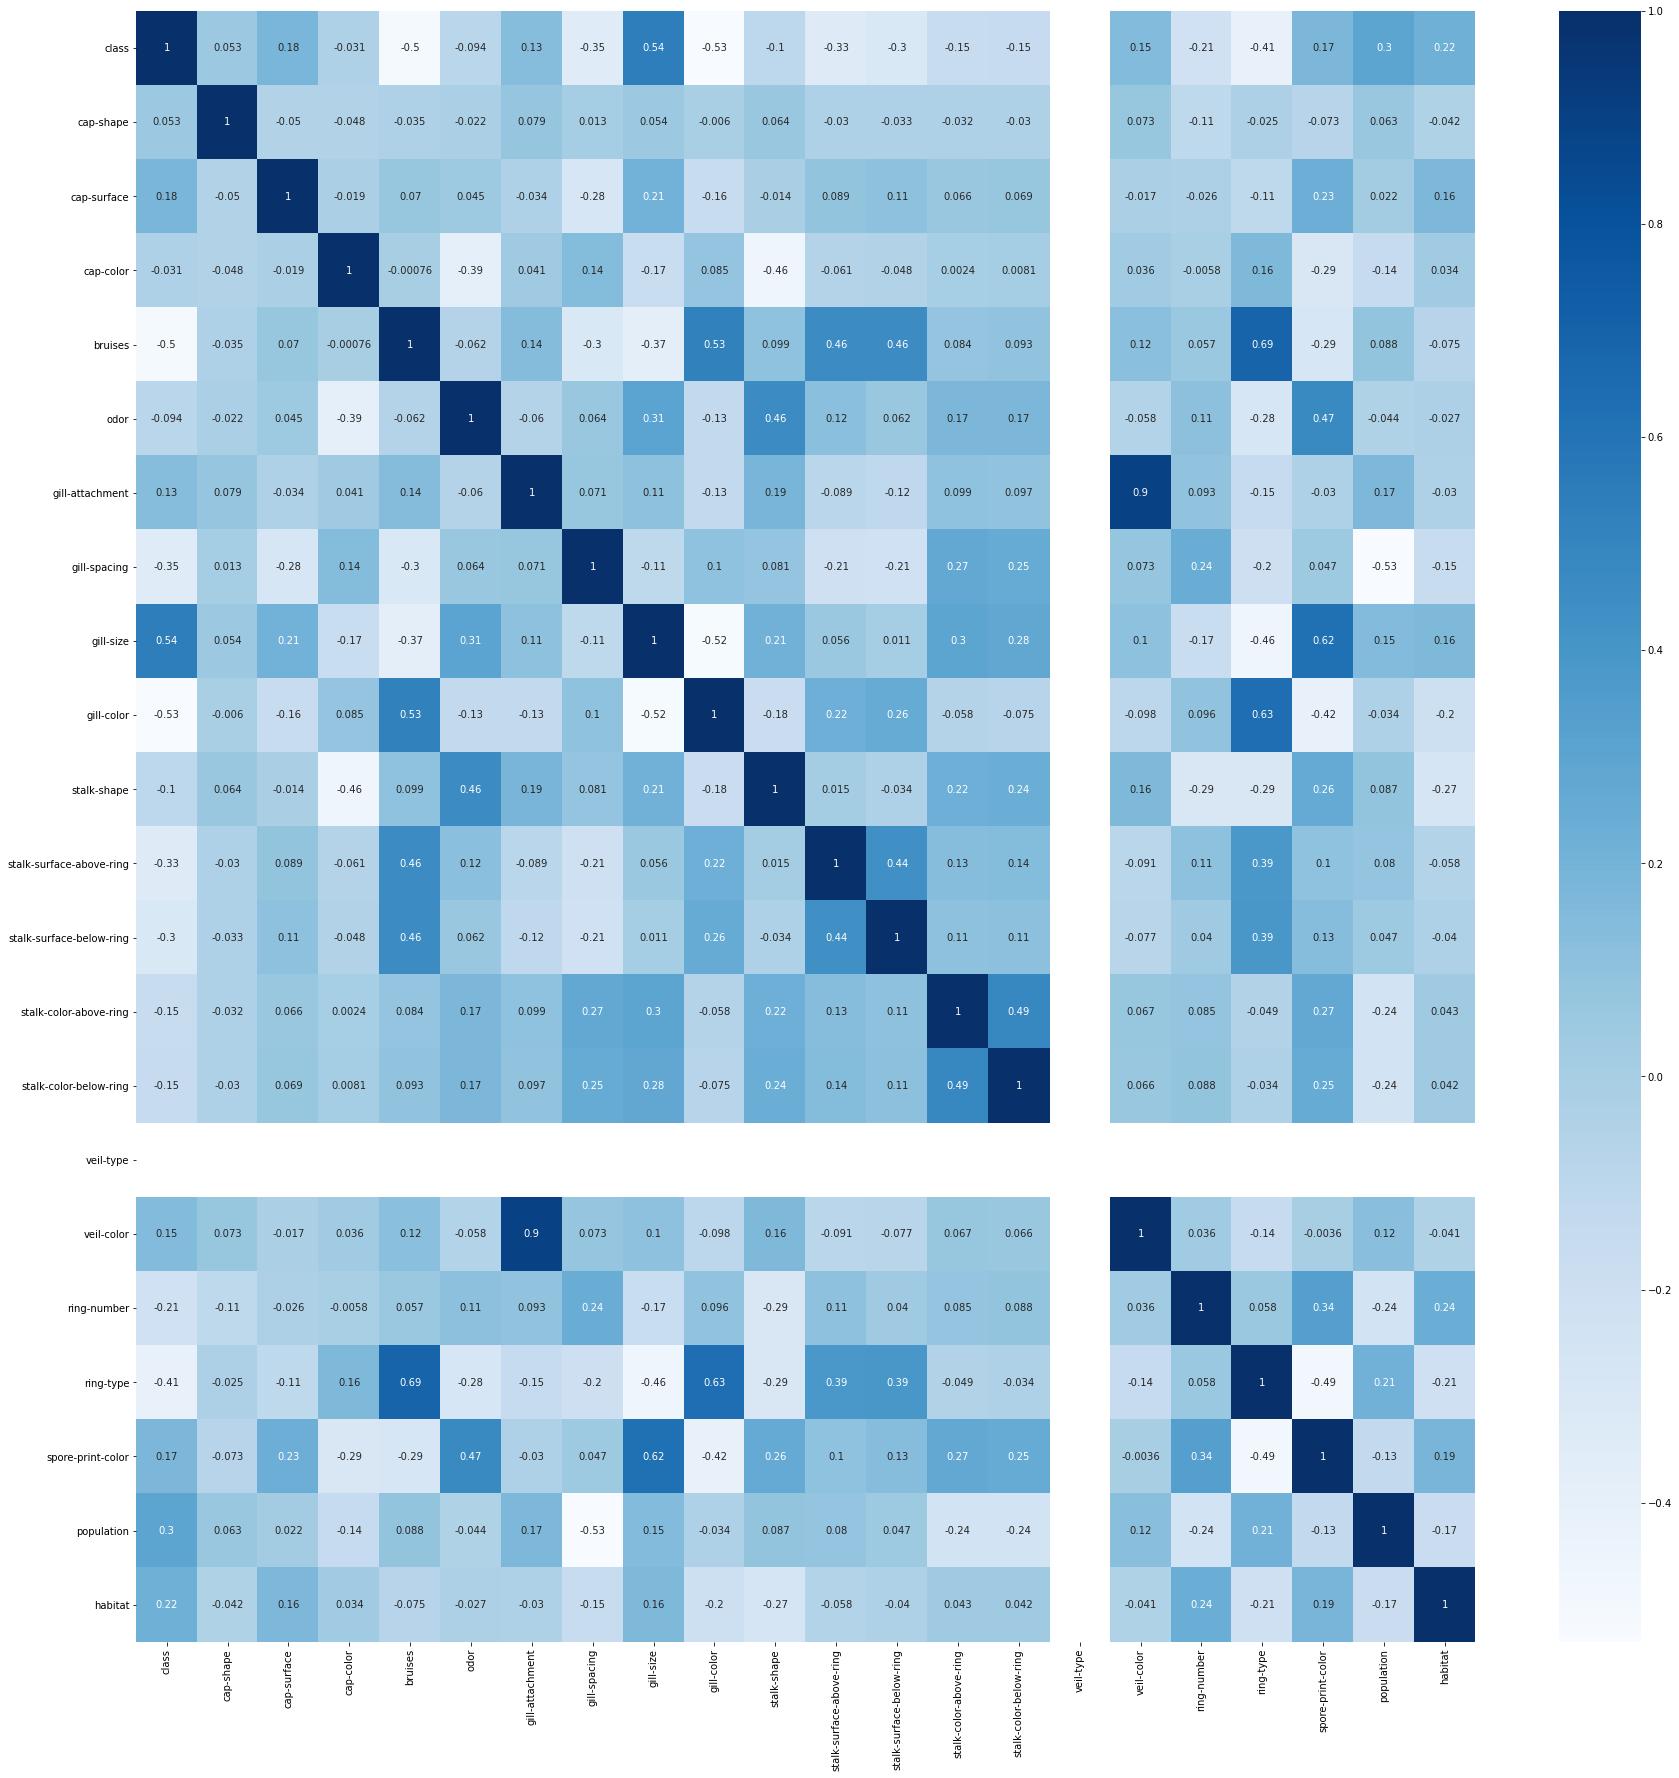

In [205]:
corr=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True,cmap='Blues')

There are not many where the data are highly negatively correlated.

Cheking the number of p and e in data set

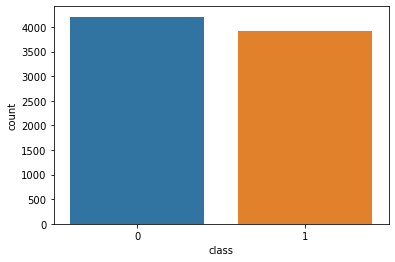

In [206]:
sns.countplot(x = 'class', data = df)
plt.show()

Plotting box to get the details on the outliers as well.

class                          AxesSubplot(0.125,0.851183;0.168478x0.0288168)
cap-shape                   AxesSubplot(0.327174,0.851183;0.168478x0.0288168)
cap-surface                 AxesSubplot(0.529348,0.851183;0.168478x0.0288168)
cap-color                   AxesSubplot(0.731522,0.851183;0.168478x0.0288168)
bruises                        AxesSubplot(0.125,0.816603;0.168478x0.0288168)
odor                        AxesSubplot(0.327174,0.816603;0.168478x0.0288168)
gill-attachment             AxesSubplot(0.529348,0.816603;0.168478x0.0288168)
gill-spacing                AxesSubplot(0.731522,0.816603;0.168478x0.0288168)
gill-size                      AxesSubplot(0.125,0.782023;0.168478x0.0288168)
gill-color                  AxesSubplot(0.327174,0.782023;0.168478x0.0288168)
stalk-shape                 AxesSubplot(0.529348,0.782023;0.168478x0.0288168)
stalk-surface-above-ring    AxesSubplot(0.731522,0.782023;0.168478x0.0288168)
stalk-surface-below-ring       AxesSubplot(0.125,0.747443;0.1684

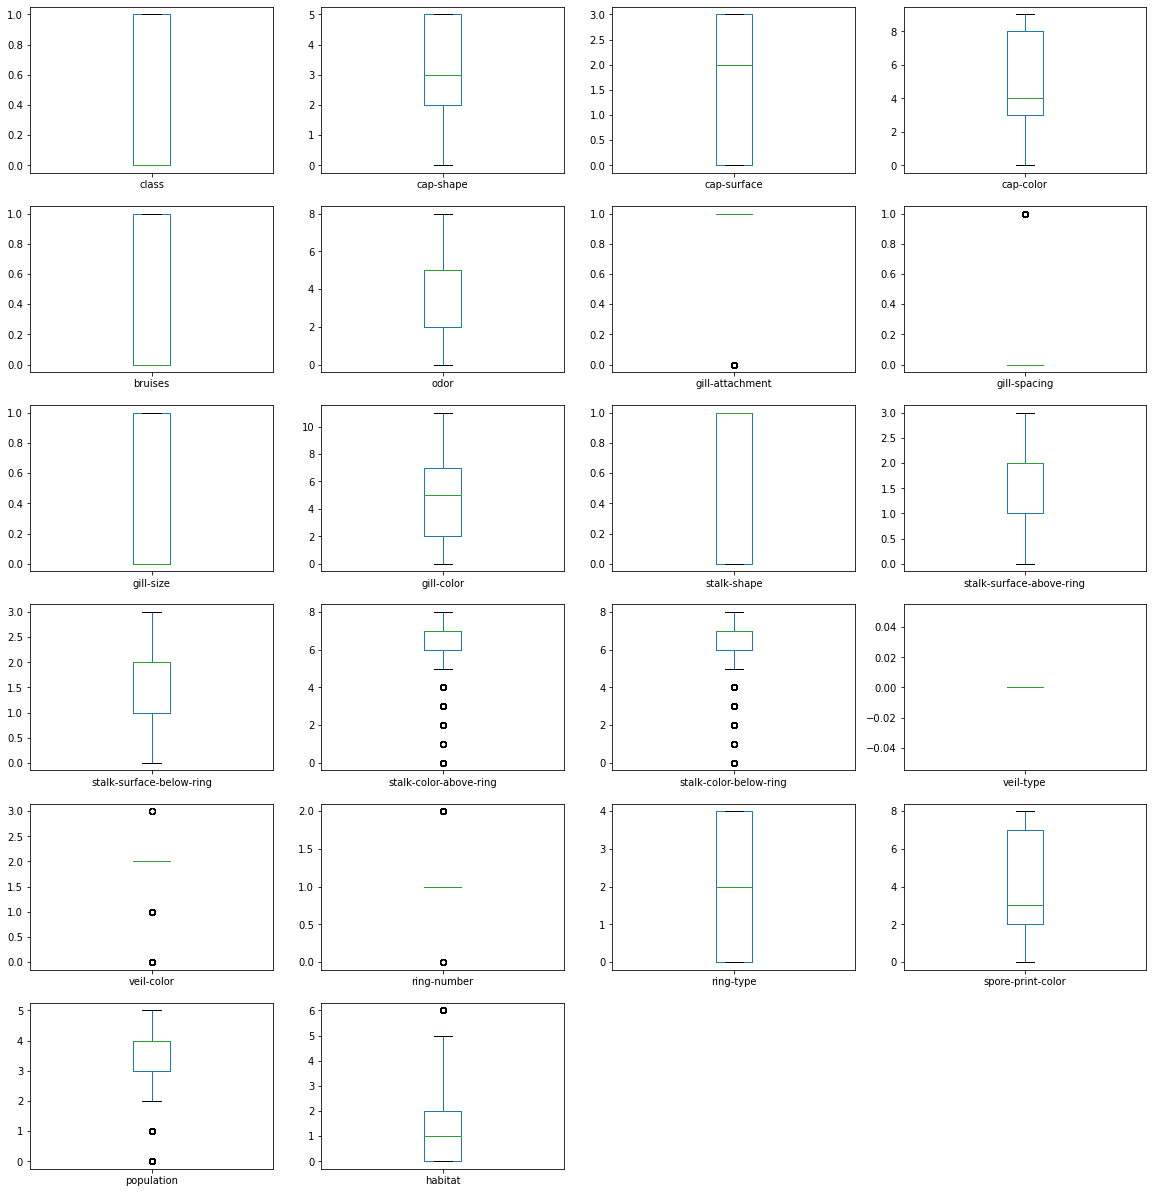

In [207]:
df.plot(kind = 'box', subplots = True, figsize=(20,80),layout = (22,4))

There are few columns in few of the columns in where outliers are there and also setting 4 columns for view gives a better clarity on the data

Now visualizing the data further to get more details.


In [208]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

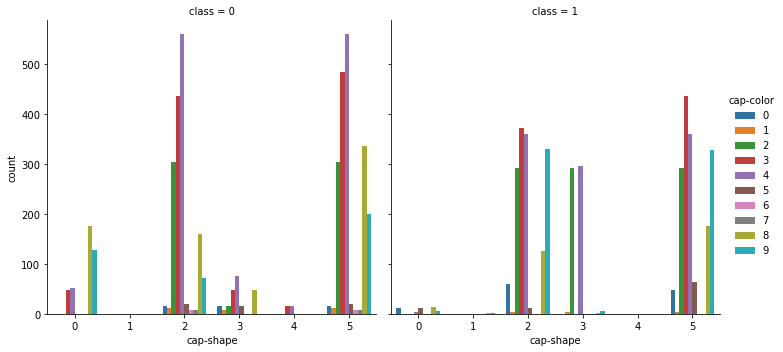

In [209]:
sns.catplot(x='cap-shape',hue='cap-color',col='class',data=df,kind='count')

Likeways we can do for bruieses and odor

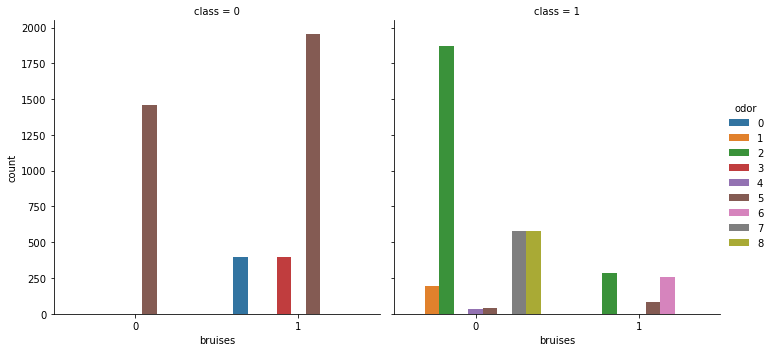

In [210]:
sns.catplot(x='bruises',hue='odor',col='class',data=df,kind='count')

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

x = pd.DataFrame(x, columns = df_x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


Modelling.

In [212]:
df_x = df.drop(columns = ['class'])
y = df[['class']]

In [213]:
y.shape

(8124, 1)

In [214]:
df_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

x = pd.DataFrame(x, columns = df_x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [216]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.22,random_state=22)

In [217]:
print(x_train.shape)


(6336, 21)


In [218]:
print(x_test.shape)


(1788, 21)


In [219]:
print(y_train.shape)


(6336, 1)


In [220]:
print(y_test.shape)

(1788, 1)


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy score: 
0.9395973154362416
[[901  39]
 [ 69 779]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       940
           1       0.95      0.92      0.94       848

    accuracy                           0.94      1788
   macro avg       0.94      0.94      0.94      1788
weighted avg       0.94      0.94      0.94      1788



Running for loop for all.

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [223]:
model=[LogisticRegression(), SVC(), DecisionTreeClassifier(),KNeighborsClassifier()]
# to get all the models in one command. Starting from 14.
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print("Accuracy of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print('Confusion :',confusion_matrix(y_test,predm))
    print('Classification report :',classification_report(y_test,predm))
    print('\n')

LogisticRegression()
Accuracy of  LogisticRegression() is :
0.9395973154362416
Confusion : [[901  39]
 [ 69 779]]
Classification report :               precision    recall  f1-score   support

           0       0.93      0.96      0.94       940
           1       0.95      0.92      0.94       848

    accuracy                           0.94      1788
   macro avg       0.94      0.94      0.94      1788
weighted avg       0.94      0.94      0.94      1788



SVC()
Accuracy of  SVC() is :
1.0
Confusion : [[940   0]
 [  0 848]]
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



DecisionTreeClassifier()
Accuracy of  DecisionTreeClassifier() is :
1.0
Confusion : [[940   0]
 [  0 848]]
Clas

We have found that K neighbors, DT and SVC are predicting 100% data right.

Doing dtc knn and svc in order to get the cross val

## SVC

In [224]:
svc=SVC(kernel='poly')  #----> default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('confusion :',confusion_matrix(y_test,predsvc))
print('classification report : \n',classification_report(y_test,predsvc))

Accuracy score : 1.0
confusion : [[940   0]
 [  0 848]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



## DTC

In [225]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('confusion :',confusion_matrix(y_test,preddtc))
print('classification report : \n',classification_report(y_test,preddtc))


Accuracy score : 1.0
confusion : [[940   0]
 [  0 848]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



## KNN

In [226]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('confusion :',confusion_matrix(y_test,predknn))
print('classification report : \n',classification_report(y_test,predknn))

Accuracy score : 1.0
confusion : [[940   0]
 [  0 848]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



## Random Forest

In [227]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy score: 
1.0
[[940   0]
 [  0 848]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



## Cross validation

In [228]:
from sklearn.model_selection import cross_val_score

In [229]:
dtscore=cross_val_score(dtc,x,y,cv=5)
print(dtscore)
print('Mean is:',dtscore.mean(),'Std deviation is:',dtscore.std())

[0.88184615 1.         1.         1.         0.66009852]
Mean is: 0.9083889352027283 Std deviation is: 0.13231055137608871


In [230]:
knscore=cross_val_score(knn,x,y,cv=5)
print(knscore)
print('Mean is:',knscore.mean(),'Std deviation is:',knscore.std())

[0.84246154 1.         0.95015385 1.         0.61514778]
Mean is: 0.8815526335733231 Std deviation is: 0.1450967550198995


In [231]:
svscore = cross_val_score(svc, x, y, cv = 5)
print(svscore)
print(svscore.mean())

[0.84430769 1.         0.968      1.         0.67302956]
0.8970674497915876


In [232]:
rfscore = cross_val_score(rf, x, y, cv = 5)
print(rfscore)
print(rfscore.mean())

[0.84246154 1.         1.         1.         0.6453202 ]
0.8975563471011746


From the above details we got to know that DTC is working best here on the data

In [233]:
import joblib
joblib.dump(dtc, 'mushroomsdt.obj')

['mushroomsdt.obj']